# 1. Importing the required libraries to the notebook¶

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2.Importing the titanic.csv data file into the notebook.

In [15]:
df=pd.read_csv(r"D:\Data Analyst\4Python\Project\titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 3.Checking for missing data in the columns

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# Conclusions after checking:
# Columns: Age, Cabin, Embarked contain null values. 
# Column Cabin contains too many null values, so it will be deleted from the DataFrame. 
# Column Age will be completed with median age for women and men,corresponding.
# Column Embarked will be completed with the most commonly appearing value. 

## 4. Deleting column Cabin

In [20]:
df=df.drop('Cabin',axis=1)

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## 5. Updating the missing values in the age column

In [22]:
# Mask of female (filter data)
mask_female=df['Sex']=='female'

In [23]:
# Check before updating how many null values are in column Age
df[mask_female].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 1 to 888
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  314 non-null    int64  
 1   Survived     314 non-null    int64  
 2   Pclass       314 non-null    int64  
 3   Name         314 non-null    object 
 4   Sex          314 non-null    object 
 5   Age          261 non-null    float64
 6   SibSp        314 non-null    int64  
 7   Parch        314 non-null    int64  
 8   Ticket       314 non-null    object 
 9   Fare         314 non-null    float64
 10  Embarked     312 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 29.4+ KB


In [24]:
# Calculate the median age of all female passengers
median_age_female=df[mask_female]['Age'].median()
median_age_female

27.0

In [25]:
# Update missing values in column Age with median_age_female
df.loc[mask_female & df['Age'].isnull(),'Age']= median_age_female

In [26]:
# Check the updating
df[mask_female].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 1 to 888
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  314 non-null    int64  
 1   Survived     314 non-null    int64  
 2   Pclass       314 non-null    int64  
 3   Name         314 non-null    object 
 4   Sex          314 non-null    object 
 5   Age          314 non-null    float64
 6   SibSp        314 non-null    int64  
 7   Parch        314 non-null    int64  
 8   Ticket       314 non-null    object 
 9   Fare         314 non-null    float64
 10  Embarked     312 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 29.4+ KB


## 6. Updating the missing values in the age column for men

In [27]:
#  Mask of male (filter data)
mask_male = df['Sex']== 'male'
df[mask_male].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            124
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [28]:
# Calculate the median age of all male passengers
median_age_male= df[mask_male]['Age'].median()
median_age_male

29.0

In [29]:
# Update missing values in column Age with median_age_male
df['Age']=df['Age'].fillna(median_age_male)

In [30]:
# Check the updating
df[mask_male].isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 7. Filling in the missing value in the embarked column with the most commonly appearing value (the most repeated value in this column)

In [31]:
# The number of null values in Embarked column
df['Embarked'] .isnull(). sum()

2

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [33]:
# Return the index of the most repeated value
mask_idxmax=df['Embarked'].value_counts().idxmax()
mask_idxmax

'S'

In [34]:
# Fill the null values
df['Embarked']= df['Embarked'].fillna(mask_idxmax)

In [35]:
# Check the update
df['Embarked'].isna().sum()

0

# 8. Create a chart to show the distribution of passengers by gender. Choose a chart that suits you best, and design it so it is clear and presentable.

##  Distribution of passengers by gender

In [36]:
# Grouping data by Gender
df.groupby('Sex')['PassengerId'].count()

Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [37]:
df.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

In [38]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: title={'center': ' Gender distribution of passengers '}>

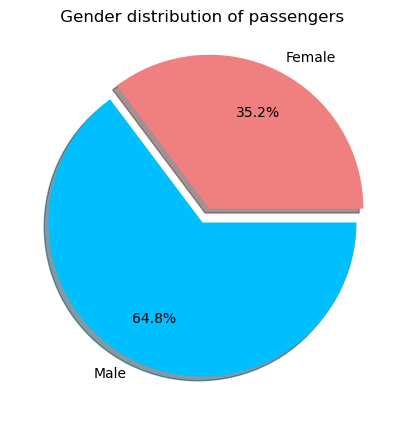

In [39]:
# Creating a chart
df.groupby('Sex').size().plot.pie( title= " Gender distribution of passengers ",
                                  colors=('lightcoral','deepskyblue'),
                                  labels=('Female', 'Male'),
                                  autopct='%1.1f%%',
                                  pctdistance=0.7,
                                  shadow=True, 
                                  explode=(0.1, 0),
                                  figsize=(5,5)                               
                                 )

In [ ]:
# Conclusion:
# The pie chart shows that male passengers had greater prevalence than female on the board of Titanic, 64.8% and 35.2% corresponding. 

# 9. Create a chart to show the distribution of passengers by gender (Sex) and whether they survived (Survived) Choose a chart that suits you best, and design it to look clear and presentable.

In [41]:
# Creating a pivot table with the data needed for chart
gender_survived= df.pivot_table(index='Survived',columns='Sex',values='PassengerId', aggfunc='count')
gender_survived

Sex,female,male
Survived,,
0,81,468
1,233,109


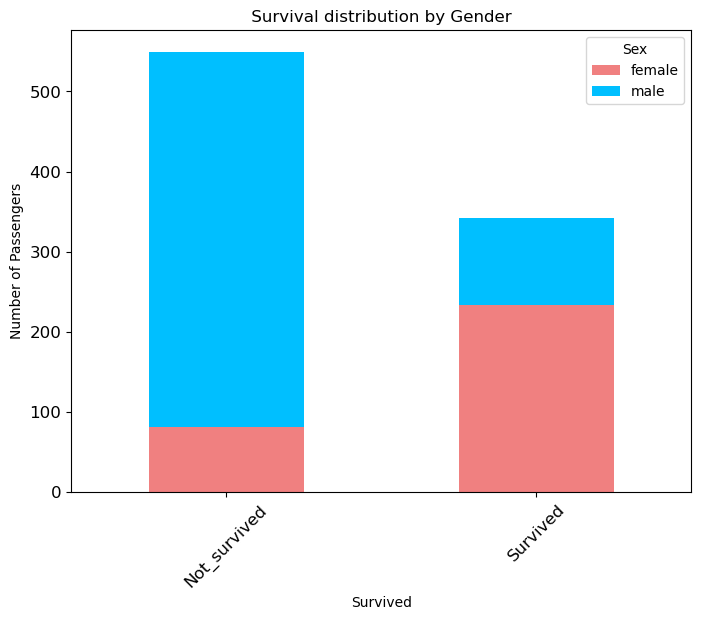

In [42]:
# Creating a bar chart to show differences between groups 
gender_survived.plot.bar(color=('lightcoral','deepskyblue'),
                        figsize=(8,6), 
                         fontsize=12,
                        stacked=True)

plt.title(' Survival distribution by Gender ')

plt.ylabel('Number of Passengers')

plt.xticks([0,1],labels=['Not_survived','Survived'],rotation=45) 
plt.show()


In [43]:
# Conclusion:
# The stacked bar chart represent the comparison between two groups of Not_survived and Survived male and female. 
# More people died than survived.
# In category of Not_survived the more prevalent are males, but in Survived category there are more female, so more women survived than men.

##  10. Use a displot chart to view the age distribution of passengers by age.

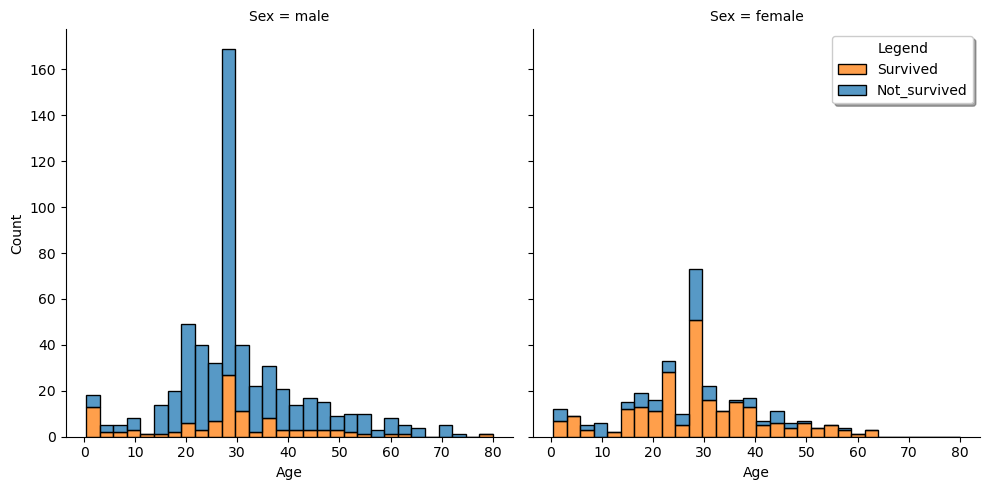

In [44]:
# Separate it into two charts according to the values in the gender column=col
# Within each chart, split the data into series according to the data in the survived column =hue
import seaborn as sns
sns.displot(data=df, x='Age', hue='Survived', multiple='stack', col='Sex',legend=False)
plt.legend(
    loc='best',
    shadow=True,
    title='Legend',
    labels=['Survived','Not_survived'])

In [45]:
# Conclusion:
# The displot shows the distribution of age for male and female and also for each category it splits the data according to Survived column.
# The predominant category of age for male is between 20-40 y.o, and for women is 15-40 y.o.

##  11. Correlation between different columns

In [47]:
# Create a correlation table by applying the corr () method 
corr_mtx= df[['Survived','Pclass','Age','SibSp','Parch','Fare','Ticket','Embarked']].corr()
corr_mtx

C:\Users\Windows\AppData\Local\Temp\ipykernel_12320\387180978.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mtx= df[['Survived','Pclass','Age','SibSp','Parch','Fare','Ticket','Embarked']].corr()


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.073296,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.338056,0.083081,0.018443,-0.549500
Age,-0.073296,-0.338056,1.000000,-0.236376,-0.176038,0.094161
SibSp,-0.035322,0.083081,-0.236376,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.176038,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.094161,0.159651,0.216225,1.000000


<Axes: >

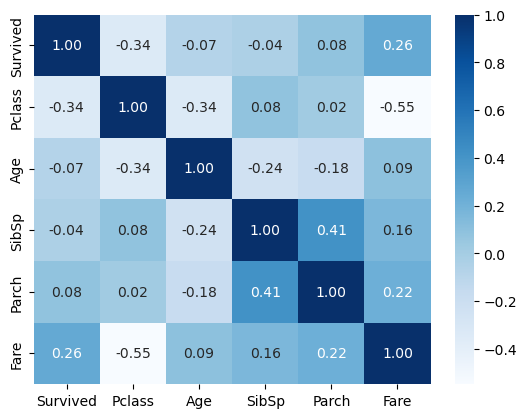

In [48]:
# Create a heatmap chart
sns.heatmap(corr_mtx, annot=True, cmap='Blues', fmt='.2f')

In [49]:
# Conclusion:
# The closer the value is to 1 (or -1), the stronger a relationship. The closer a number is to 0, the weaker the relationship.
# A negative coefficient will tell us that the relationship is negative, meaning that as one value increases, the other decreases. Similarly, a positive coefficient indicates that as one value increases, so does the other.
# A diagonal line of the values of 1 is because these values represent the correlation between a column and itself.
# The strongest correlation is 0.41, and the weakest is 0.02

# 12. Define 3 research questions that will help us find out who has a high chance of surviving, and then answer the questions you have defined

# 1.How age contributed to survival rates?

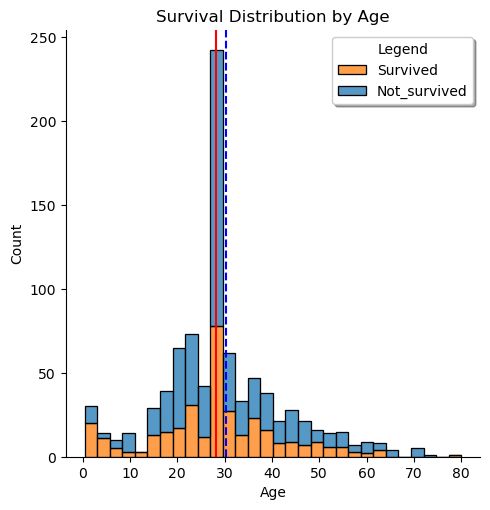

In [50]:
# Create a distribution plot-histogram 
sns.displot(data=df, x='Age', hue='Survived', multiple='stack', legend=False)
plt.legend(
    loc='best',
    shadow=True,
    title='Legend',
    labels=['Survived','Not_survived'])

plt.title('Survival Distribution by Age',
         loc='center')

# Add mean line(average age)- survived:
mean_age_survived = df[df['Survived'] == 1]['Age'].mean()
plt.axvline(x=mean_age_survived, color='red')

# Add mean line(average age)- not_survived:
mean_age_survived = df[df['Survived'] == 0]['Age'].mean()
plt.axvline(x=mean_age_survived, color='blue',linestyle='--' )

plt.show()

In [51]:
# Conclusion:
# The displot shows that the age of passengers that survived is more prevalent between 20-40 y.o. with average survival age of 28.23 y.o.-younger than non-survivors(30.19 y.o.).

In [52]:
mean_age_survived = df[df['Survived'] == 1]['Age'].mean()
mean_age_survived

28.23295321637427

In [53]:
mean_age_survived = df[df['Survived'] == 0]['Age'].mean()
mean_age_survived

30.193989071038253

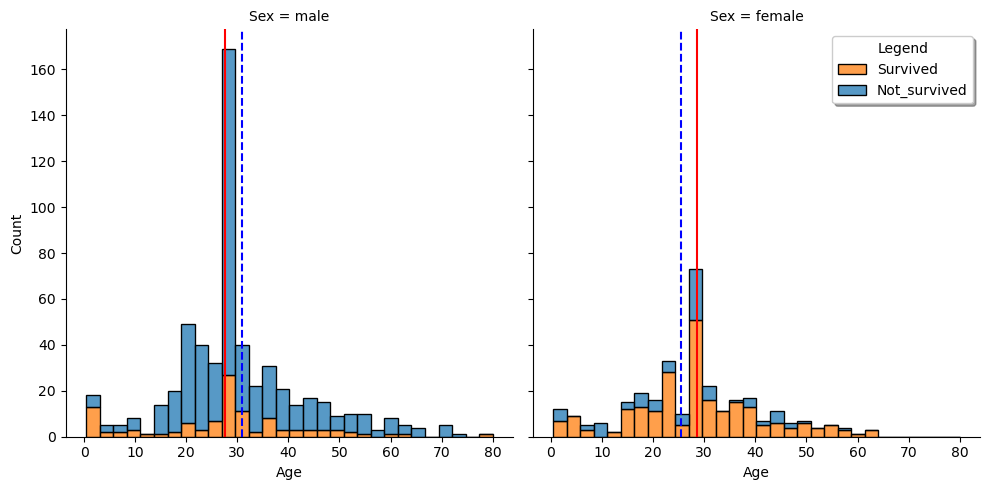

In [54]:
# Create a Multi-Panel plots by gender column=col 
g= sns.displot(data=df, x='Age', hue='Survived', multiple='stack', col='Sex',legend=False)
plt.legend(
    loc='best',
    shadow=True,
    title='Legend',
    labels=['Survived','Not_survived', ])

# Add mean line(average age) for male-survived:
mask1=df['Survived'] == 1
mask_m=df['Sex'] == 'male'
masks=[mask1 & mask_m]
mean_age_survived_male = df.loc[mask1 & mask_m,'Age'].mean()
g.axes[0][0].axvline(x=mean_age_survived_male, color='red')

# Add mean line(average age) for male- not_survived:
mask0=df['Survived'] == 0
mask_m=df['Sex'] == 'male'
masks=[mask0 & mask_m]
mean_age_survived_male = df.loc[mask0 & mask_m,'Age'].mean()
g.axes[0][0].axvline(x=mean_age_survived_male, color='blue', linestyle='--')

# Add mean line(average age) for female- survived:
mask1=df['Survived'] == 1
mask_f=df['Sex'] == 'female'
masks=[mask1 & mask_f]
mean_age_survived_female = df.loc[mask1 & mask_f,'Age'].mean()
g.axes[0][1].axvline(x=mean_age_survived_female, color='red')

# Add mean line(average age) for female- not_survived:
mask0=df['Survived'] == 0
mask_f=df['Sex'] == 'female'
masks=[mask1 & mask_f]
mean_age_survived_female = df.loc[mask0 & mask_f,'Age'].mean()
g.axes[0][1].axvline(x=mean_age_survived_female, color='blue', linestyle='--')

plt.show()

In [55]:
# Conclusion:
# In a detailed analysis of male and female age of surviving, can be noticed that male age is more predominant in interval of 30 y.o.(mean survival age-27.52 y.o.),
# but for women predominant age interval is wider from 15-40 y.o.(mean survival age-28.56 y.o.). 
# In case of men younger passengers survived, but for women older passenger survived.

In [56]:
# average age for male:
mask1=df['Survived'] == 1
mask_m=df['Sex'] == 'male'
masks=[mask1 & mask_m]
df.loc[mask1 & mask_m,'Age'].mean()

27.52908256880734

In [57]:
# average age for female:
mask1=df['Survived'] == 1
mask2=df['Sex'] == 'female'
masks=[mask1 & mask2]
df.loc[mask1 & mask2,'Age'].mean()

28.56223175965665

# 2.Who has higher chances of surviving, male or female?

In [59]:
# Creating a pivot table with the data needed for chart
gender_survived= df.pivot_table(index='Survived',columns='Sex',values='PassengerId', aggfunc='count')
gender_survived

Sex,female,male
Survived,,
0,81,468
1,233,109


In [60]:
gender_survived.sum().values.sum()

891

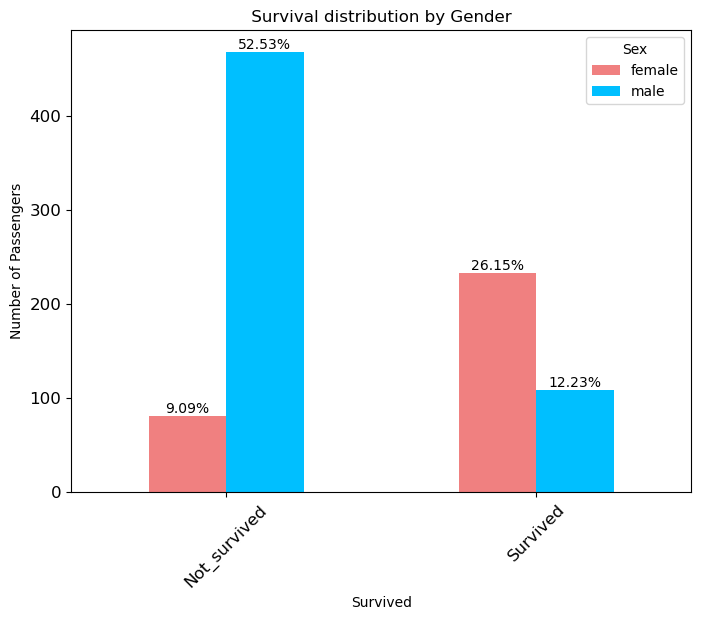

In [64]:
# Creating a bar chart to show differences between groups: Survived and Not_Survived in gender proportion 
ax= gender_survived.plot.bar(color=('lightcoral','deepskyblue'),
                              figsize=(8,6), 
                              fontsize=12 )
plt.title(' Survival distribution by Gender ')

plt.ylabel('Number of Passengers')

plt.xticks([0,1],labels=['Not_survived','Survived'],rotation=45)

# Add percentage values above each bar
for p in ax.patches:
    percentage = f'{p.get_height() / gender_survived.sum().values.sum() * 100:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

In [65]:
# Conclusion:
# In category of Not_survived the more prevalent are males 52.53% then female(9.09%), but in Survived category there are more female(26.15%) then male (12.23%).
# More women survived than men from the whole number of passengers.

# 3. Does the passenger class have an impact on survival rates?

In [67]:
# Aggregate the data by Passenger class and Survived
passenger_class= df.pivot_table(index='Pclass',columns='Survived', values='PassengerId',aggfunc='count')
passenger_class


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


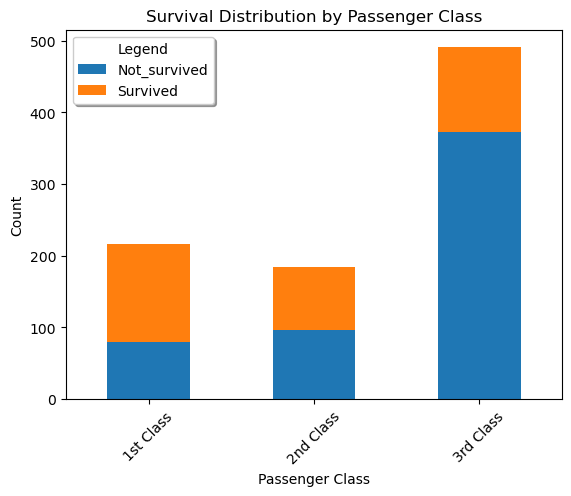

In [69]:
# Create a stacked bar chart to show comparisons between three categories: 1st, 2nd, 3rd class
passenger_class.plot.bar(stacked=True)
plt.legend(
    loc='best',
    shadow=True,
    title='Legend',
    labels=['Not_survived','Survived'])

plt.title('Survival Distribution by Passenger Class')

plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks([0,1,2],['1st Class','2nd Class','3rd Class'], rotation=45)

plt.show()

In [70]:
# Conclusion:
# Class I has higher chances of surviving, since there are more survived passengers then in other classes. 

# 4.Does the fare have an impact on survival rates?

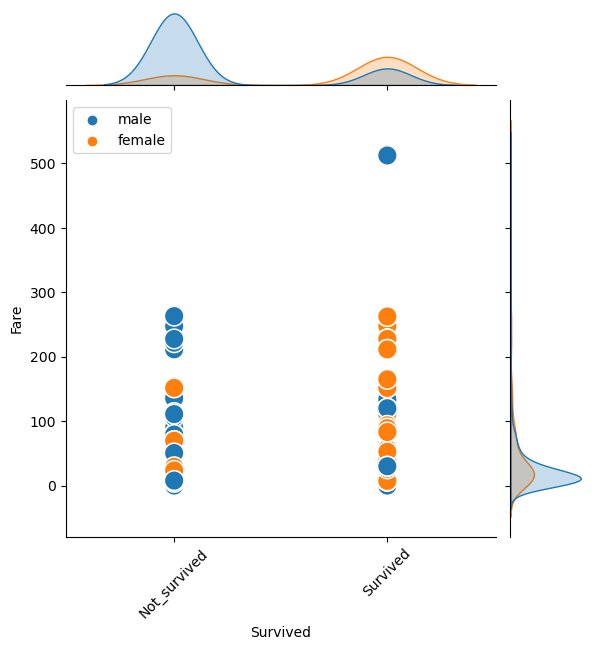

In [71]:
#Create jointplot to see correlation between surviving and fare, and also the distribution of fare and survived.
sns.jointplot(x='Survived', y='Fare', data=df, hue='Sex', s=200 )

plt.xticks([0,1],labels=['Not_survived','Survived'],rotation=45) 

plt.legend(loc='upper left')


plt.show()

In [72]:
# Conclusion:
# Correlation between Survived and Fare is 0.26 this indicates that the more people pay for ticket, the higher the survival chances are.
# The deaths are not present at a fare higher than $300, which correspond to 1st class.
# Only 3 people paid more than 300 $ for 1st Class and survived.

In [73]:
#Verification
df.groupby('Fare').size()

Fare
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Length: 248, dtype: int64

In [74]:
# Determine how many people paid 300 or more than 
mask=df['Fare'] >= 300

In [75]:
df[mask].value_counts()

PassengerId  Survived  Pclass  Name                                Sex     Age   SibSp  Parch  Ticket    Fare      Embarked
259          1         1       Ward, Miss. Anna                    female  35.0  0      0      PC 17755  512.3292  C           1
680          1         1       Cardeza, Mr. Thomas Drake Martinez  male    36.0  0      1      PC 17755  512.3292  C           1
738          1         1       Lesurer, Mr. Gustave J              male    35.0  0      0      PC 17755  512.3292  C           1
dtype: int64

In [76]:
# What is the maximum fare?
df['Fare'].max()

512.3292

In [ ]:
# Conclusions:
# The age of passengers that survived is more prevalent between 20-40 y.o. So, in case of men, younger passengers had a higher chance of survival, but for women, older passengers.
# More women survived than men.
# Passengers in Class I had higher chances of surviving compared to other classes.
# The higher the ticket fare, the higher the survival chances, with no deaths reported for fares higher than $300.